In [255]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob2

In [256]:
def click(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        img_points.append([x, y])

In [257]:
def show_fig(picture, fig = (10,10)):
    plt.figure(figsize=fig)
    plt.imshow(cv2.cvtColor(picture, cv2.COLOR_BGR2RGB))
    plt.show()

In [258]:
imgs = []

# for file in glob2.glob("Part3_images_set2/*.jpg"):
for file in glob2.glob("Part3_images/*.jpg"):
    temp = cv2.imread(file, 1) 
    temp = cv2.resize(temp, (1512, 2016))
    imgs.append(temp)
    
imgs = np.array(imgs)

images = []

# imgs = [cv2.imread(file) for file in glob2.glob("Part3_images/*.jpg")]


# # MFA images
# # Reordering the images
images.append(imgs[1])
images.append(imgs[0])
images.append(imgs[4])
images.append(imgs[2])
images.append(imgs[3])


# # Brick wall images
# # Reordering the images
# images.append(imgs[0])
# images.append(imgs[3])
# images.append(imgs[4])
# images.append(imgs[1])
# images.append(imgs[2])


# # Gas Station images
# # Reordering the images
# images.append(imgs[0])
# images.append(imgs[3])
# images.append(imgs[4])
# images.append(imgs[1])
# images.append(imgs[2])


images = np.array(images)

In [308]:
mosaic1 = []
mask = np.zeros((images[1].shape[0], images[1].shape[1]*3, 3), dtype=np.uint8)
mosaic1 = np.append(np.append(mask, images[0], axis=1), mask, axis=1)
# mosaic = np.append(np.append(mask, mosaic, axis=1), mask, axis=1)

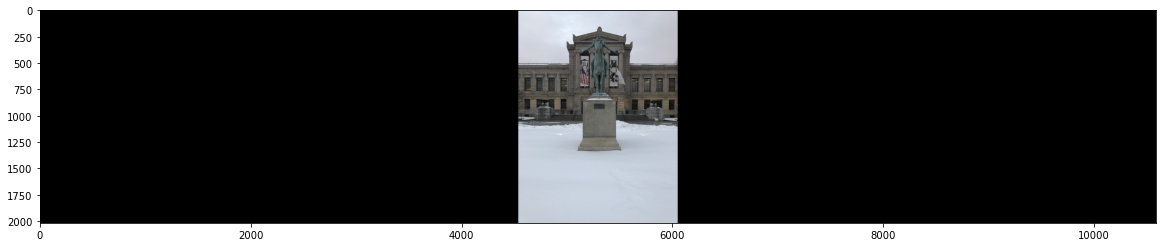

In [309]:
show_fig(mosaic1, (20, 20))

In [319]:
def get_H(points):
    t = []
    for i in range(0, 4):
        t.append([points[0][i][0]])
        t.append([points[0][i][1]])

    P = []
    for i in range(0, 4):
        P.append([points[1][i][0], points[1][i][1], 1, 0, 0, 0, -points[1][i][0]*points[0][i][0], -points[1][i][1]*points[0][i][0]])
        P.append([0, 0, 0, points[1][i][0], points[1][i][1], 1, -points[1][i][0]*points[0][i][1], -points[1][i][1]*points[0][i][1]])

    P_inv = np.linalg.inv(np.array(P))
    h = np.matmul(P_inv, t)
    h = np.append(h, 1)
    
    print(np.array(t).shape, np.array(P).shape, np.reshape(h, (3,3)))
    
    return np.reshape(h, (3,3))

In [320]:
points1 = []
img = [mosaic1, images[1]]
for i in range(0, 2):
    img_points = []
    cv2.imshow('image', img[i]) 
    cv2.setMouseCallback('image', click) 
    cv2.waitKey(0)   
    cv2.destroyAllWindows()
    points1.append(img_points)

(8, 1) (8, 8) [[-6.76351363e-01  3.25449188e-02  5.46334215e+03]
 [-2.80733591e-01  9.32551324e-01  1.10257397e+02]
 [-2.79721053e-04  8.32990241e-06  1.00000000e+00]]


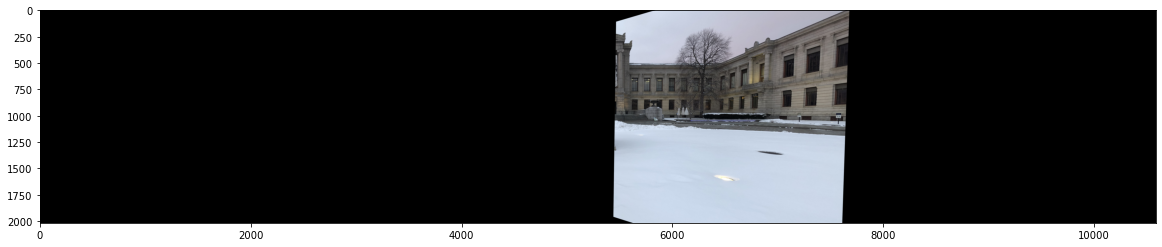

In [321]:
H = get_H(points1)
img_out1 = cv2.warpPerspective(images[1], H, (mosaic1.shape[1], mosaic1.shape[0]))
show_fig(img_out1, (20,20))

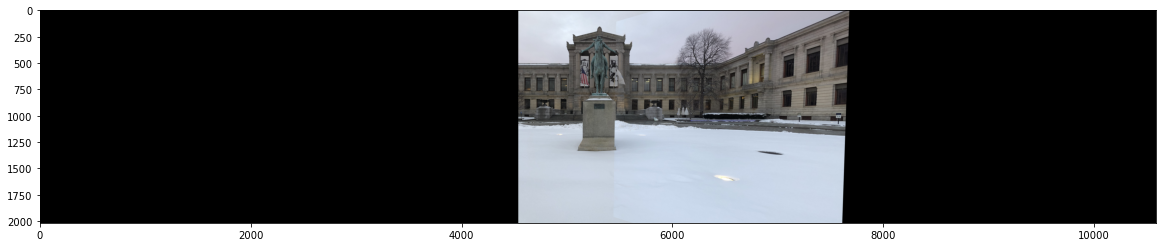

In [323]:
final1 = np.maximum(img_out1, mosaic1)
show_fig(final1, (20,20))

In [324]:
mosaic2 = final1

In [325]:
points2 = []
img = [mosaic2, images[2]]
for i in range(0, 2):
    img_points = []
    cv2.imshow('image', img[i]) 
    cv2.setMouseCallback('image', click) 
    cv2.waitKey(0)   
    cv2.destroyAllWindows()
    points2.append(img_points)

(8, 1) (8, 8) [[ 4.93885471e+00 -7.22976136e-02  2.50491632e+03]
 [ 6.48389018e-01  1.80103588e+00 -7.69916003e+02]
 [ 6.55556565e-04 -2.13782866e-05  1.00000000e+00]]


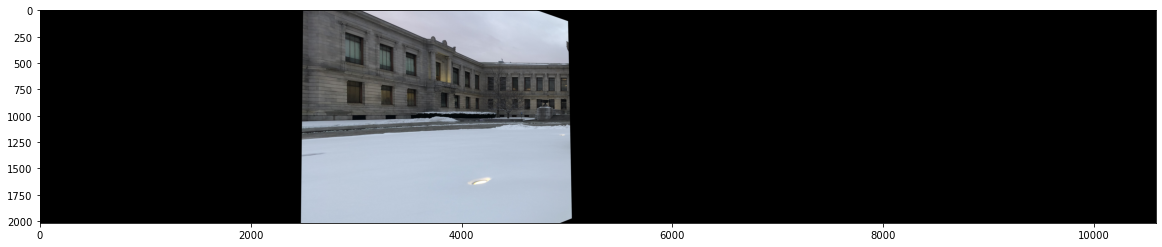

In [326]:
H = get_H(points2)
img_out2 = cv2.warpPerspective(images[2], H, (mosaic2.shape[1], images[2].shape[0]))
show_fig(img_out2, (20,20))

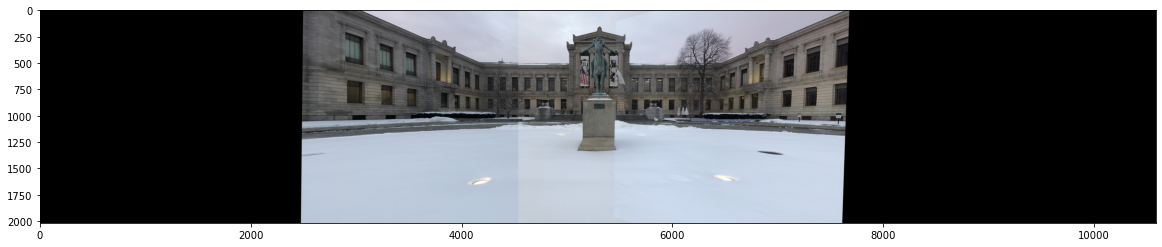

In [328]:
final2 = np.maximum(img_out2, final1)
show_fig(final2, (20,20))

In [329]:
mosaic3 = final2

In [330]:
points3 = []
img = [mosaic3, images[3]]
for i in range(0, 2):
    img_points = []
    cv2.imshow('image', img[i]) 
    cv2.setMouseCallback('image', click) 
    cv2.waitKey(0)   
    cv2.destroyAllWindows()
    points3.append(img_points)

(8, 1) (8, 8) [[-2.28775009e+00  4.59760173e-02  6.38656426e+03]
 [-5.49777630e-01  1.10786470e+00 -4.84671893e+01]
 [-5.48975493e-04  1.69804585e-05  1.00000000e+00]]


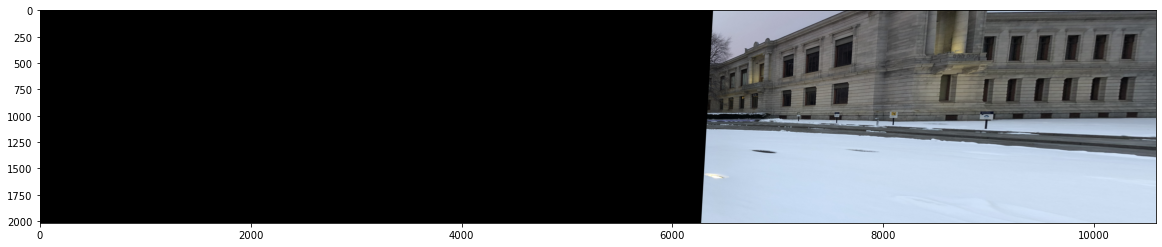

In [331]:
H = get_H(points3)
img_out3 = cv2.warpPerspective(images[3], H, (mosaic3.shape[1], images[3].shape[0]))
show_fig(img_out3, (20,20))

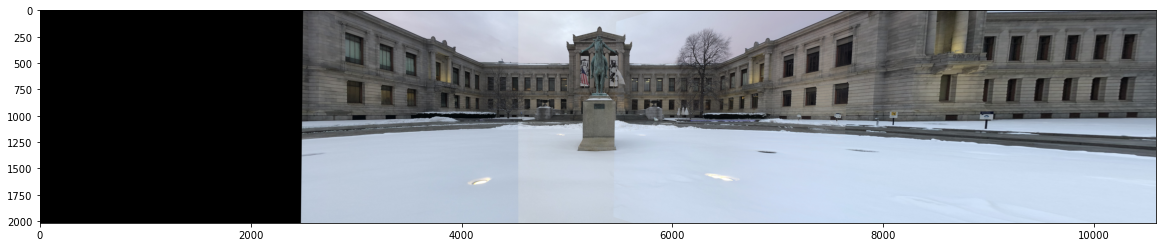

In [332]:
final3 = np.maximum(img_out3, final2)
show_fig(final3, (20,20))

In [333]:
mosaic4 = final3

In [334]:
points4 = []
img = [mosaic4, images[4]]
for i in range(0, 2):
    img_points = []
    cv2.imshow('image', img[i]) 
    cv2.setMouseCallback('image', click) 
    cv2.waitKey(0)   
    cv2.destroyAllWindows()
    points4.append(img_points)

(8, 1) (8, 8) [[ 3.96957598e+01 -6.86274461e-01 -1.60205445e+04]
 [ 6.47558111e+00  1.15277236e+01 -1.04193368e+04]
 [ 6.39679048e-03 -2.68137696e-04  1.00000000e+00]]


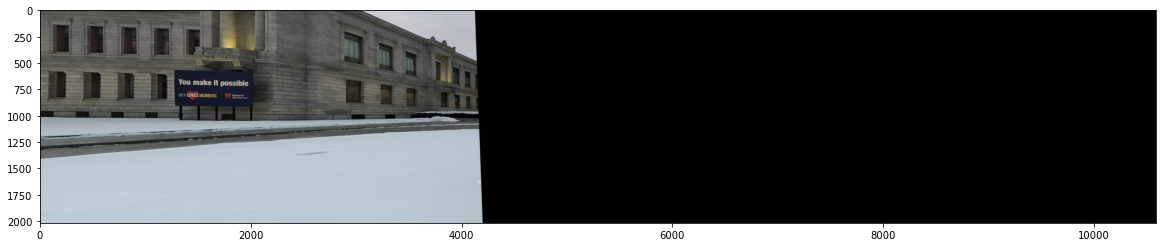

In [335]:
H = get_H(points4)
img_out4 = cv2.warpPerspective(images[4], H, (mosaic4.shape[1], images[4].shape[0]))
show_fig(img_out4, (20,20))

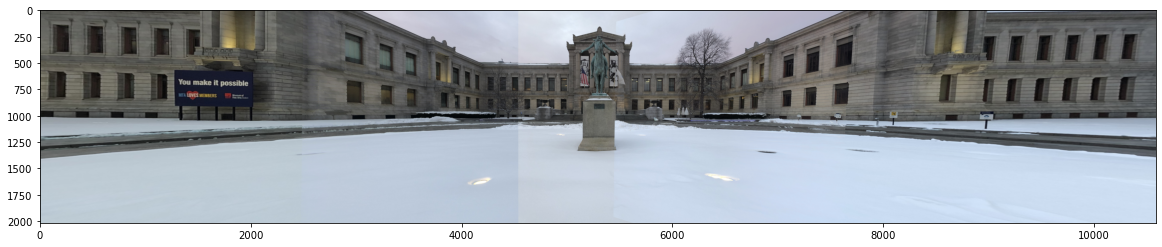

In [336]:
final4 = np.maximum(img_out4, final3)
show_fig(final4, (20,20))

In [337]:
mosaic5 = final4

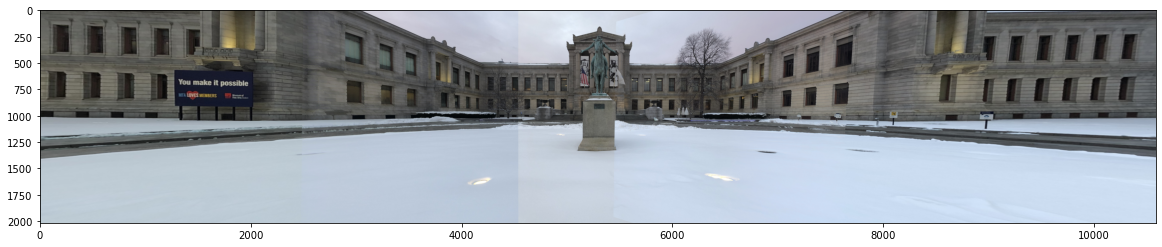

In [338]:
show_fig(mosaic5, (20,20))

In [339]:
cv2.imshow('Output', mosaic5) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [340]:
# cv2.imwrite('Output1a3.png',final)

True

In [302]:
# mosaic_final = np.maximum(np.maximum(np.maximum(np.maximum(mosaic1, img_out1), img_out2), img_out3), img_out4)

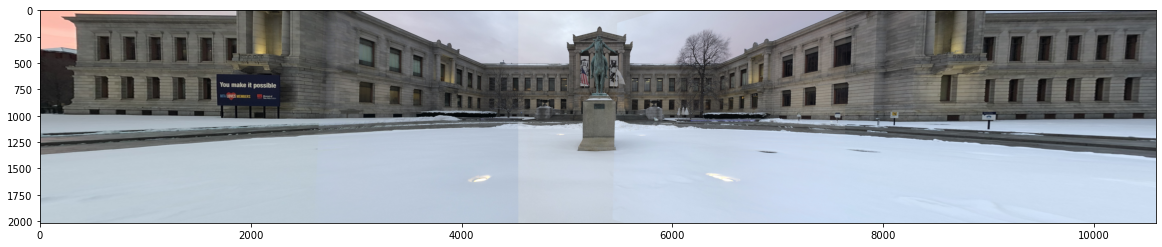

In [303]:
# show_fig(mosaic_final, (20,20))

In [304]:
# cv2.imwrite('Output1a3.png',final)

True